In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### import datasets

In [118]:
train_full = pd.read_csv('./Data/train.csv')
test_full = pd.read_csv('./Data/test.csv')

In [121]:
test_full_Id = test_full['Id']

In [51]:
train_full.drop("Id", axis=1, inplace=True)
test_full.drop("Id", axis=1, inplace=True)

In [112]:
train_full.shape
test_full.shape

(1459, 79)

In [53]:
train_full.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [54]:
qual = train_full.select_dtypes(include=['object']).columns
print(f"Features Quali:\n {qual}")
quant = train_full.select_dtypes(include=['float64', 'int64']).columns
print(f"Features Quanti:\n {quant}")

Features Quali:
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Features Quanti:
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfB

In [55]:
train_full_quant = train_full[quant]
train_full_quant.shape

(1460, 37)

In [56]:
print(f"Nombre de NAs dans train_full[quant]: \n {train_full_quant.isna().sum()}")

Nombre de NAs dans train_full[quant]: 
 MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64


In [57]:
train_full_quant = train_full_quant.fillna(0)

In [58]:
print(f"Nombre de NAs dans train_full[quant]: \n {train_full_quant.isna().sum()}")

Nombre de NAs dans train_full[quant]: 
 MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


### Détection et suppresion des outliers

In [59]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 200, random_state = 42)
clf.fit(train_full_quant)
y_noano = clf.predict(train_full_quant)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train_full_quant = train_full_quant.iloc[y_noano[y_noano['Top'] == 1].index.values]
train_full_quant.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train_full_quant.shape[0])

C:\Users\utilisateur\Anaconda3\envs\p3.6\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\utilisateur\Anaconda3\envs\p3.6\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Number of Outliers: 146
Number of rows without outliers: 1314


C:\Users\utilisateur\Anaconda3\envs\p3.6\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


### Comptage du nombre de features quantitatives et qualitatives

In [60]:
num_quant_train_full = len(train_full.select_dtypes(include=['int64','float64']).columns)
num_qual_train_full = len(train_full.select_dtypes(include=['object']).columns)

print(f"{num_quant_train_full} features numériques & {num_qual_train_full} features catégorielles")

37 features numériques & 43 features catégorielles


### Matrice de confustion (features quantitatives)

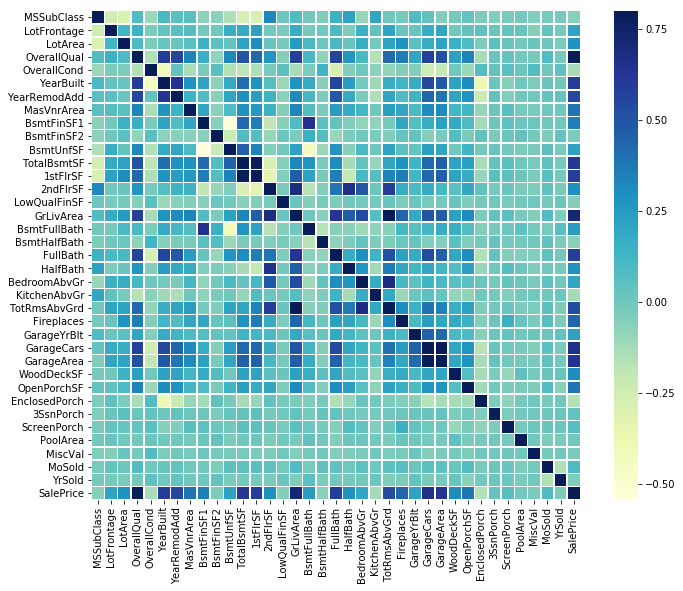

In [61]:
corrmat = train_full_quant.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, linewidths=.5, cmap="YlGnBu");

### Sélection des 10 plus grosses corrélations parmis les features quantitatives

In [62]:
cols = corrmat.nlargest(11,'SalePrice').index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'YearBuilt', 'FullBath', '1stFlrSF', 'YearRemodAdd',
       'TotRmsAbvGrd'],
      dtype='object')

### Matrice de confusion des 10 features quantitatives les plus corrélées

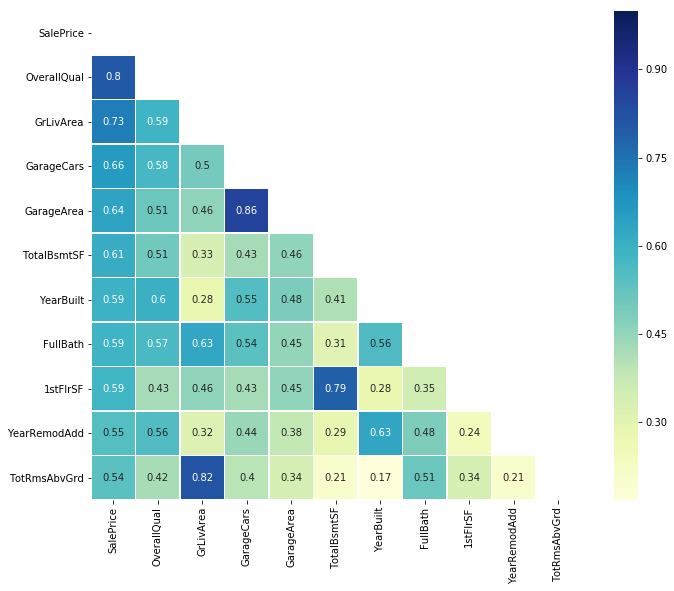

In [63]:
corrmat2 = train_full_quant[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat2, vmax=1, square=True, linewidths=.5, cmap="YlGnBu", annot=True, mask=np.triu(corrmat2));

In [64]:
train_full_quant.drop(["TotRmsAbvGrd", "GarageCars", "TotalBsmtSF", "GarageYrBlt"], axis=1, inplace=True)

In [65]:
quant = train_full_quant.select_dtypes(include=['float64', 'int64']).columns

In [66]:
corrmat3 = train_full_quant.corr()
cols3 = corrmat3.nlargest(11,'SalePrice').index
cols3

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt',
       'FullBath', '1stFlrSF', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea',
       'OpenPorchSF'],
      dtype='object')

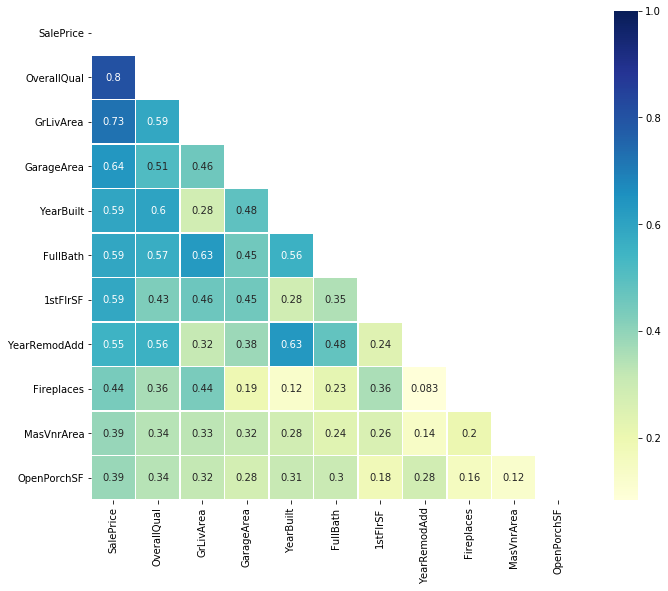

In [67]:
corrmat4 = train_full_quant[cols3].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat4, vmax=1, square=True, linewidths=.5, cmap="YlGnBu", annot=True, mask=np.triu(corrmat4));

### Affichage des correlations avec SalePrice des 10 features quantitatives les plus fortement corrélées

In [68]:
corrmat4['SalePrice']

SalePrice       1.000000
OverallQual     0.803117
GrLivArea       0.725020
GarageArea      0.635267
YearBuilt       0.593849
FullBath        0.589885
1stFlrSF        0.585174
YearRemodAdd    0.550722
Fireplaces      0.438582
MasVnrArea      0.389110
OpenPorchSF     0.385297
Name: SalePrice, dtype: float64

### Visualisation des data des 10 features quantitatives les plus fortement corrélées avec SalePrice

OverallQual / SalePrice

corr : 0.803


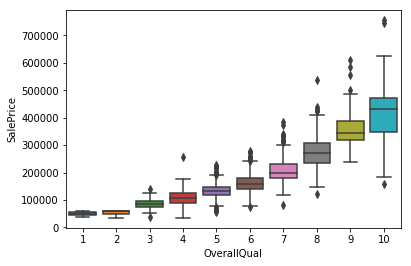

In [69]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train_full)
print(f"corr : {round(train_full_quant['OverallQual'].corr(train_full_quant['SalePrice']),3)}")

Enlèvement des outliers de OverallQual

corr : 0.822


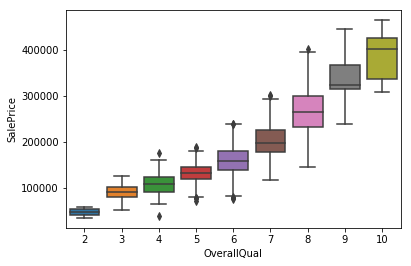

In [70]:
train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>700000)].index).reset_index(drop=True)

train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>405000)&(train_full_quant['OverallQual']==8)].index).reset_index(drop=True)
train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']<130000)&(train_full_quant['OverallQual']==8)].index).reset_index(drop=True)

train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>480000)&(train_full_quant['OverallQual']==9)].index).reset_index(drop=True)

train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>305000)&(train_full_quant['OverallQual']==7)].index).reset_index(drop=True)
train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']<100000)&(train_full_quant['OverallQual']==7)].index).reset_index(drop=True)

train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>240000)&(train_full_quant['OverallQual']==6)].index).reset_index(drop=True)

train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>190000)&(train_full_quant['OverallQual']==5)].index).reset_index(drop=True)
train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']<70000)&(train_full_quant['OverallQual']==5)].index).reset_index(drop=True)

train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>130000)&(train_full_quant['OverallQual']==3)].index).reset_index(drop=True)
train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']<50000)&(train_full_quant['OverallQual']==3)].index).reset_index(drop=True)


train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>200000)&(train_full_quant['OverallQual']==4)].index).reset_index(drop=True)
sns.boxplot(x='OverallQual',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['OverallQual'].corr(train_full_quant['SalePrice']),3)}")


GrLivArea / SalePrice

corr : 0.716


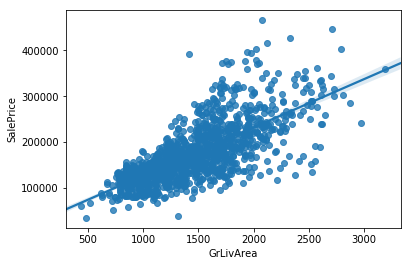

In [71]:
sns.regplot(x='GrLivArea',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['GrLivArea'].corr(train_full_quant['SalePrice']),3)}")

GarageArea / SalePrice

corr : 0.632


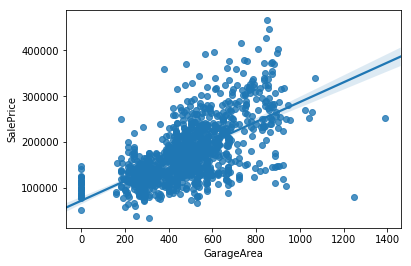

In [72]:
sns.regplot(x='GarageArea',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['GarageArea'].corr(train_full_quant['SalePrice']),3)}")

YearBuilt / SalePrice

corr : 0.598


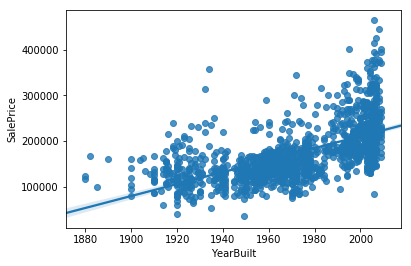

In [73]:
sns.regplot(x='YearBuilt',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['YearBuilt'].corr(train_full_quant['SalePrice']),3)}")

1stFlrSF / SalePrice

corr : 0.587


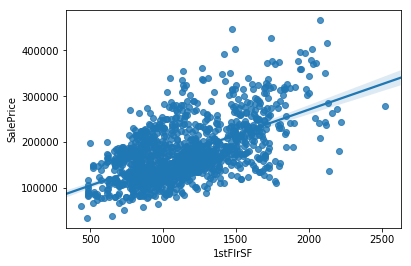

In [74]:
sns.regplot(x='1stFlrSF',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['1stFlrSF'].corr(train_full_quant['SalePrice']),3)}")

FullBath / SalePrice

corr : 0.588


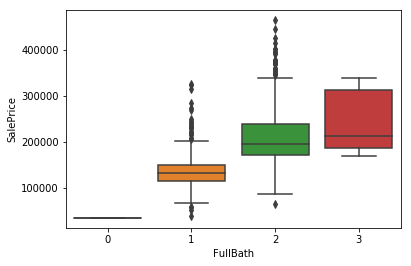

In [75]:
sns.boxplot(x='FullBath',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['FullBath'].corr(train_full_quant['SalePrice']),3)}")

YearRemodAdd / SalePrice

corr : 0.545


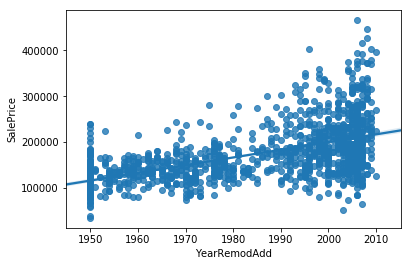

In [76]:
sns.regplot(x='YearRemodAdd',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['YearRemodAdd'].corr(train_full_quant['SalePrice']),3)}")

Fireplaces / SalePrice

corr : 0.437


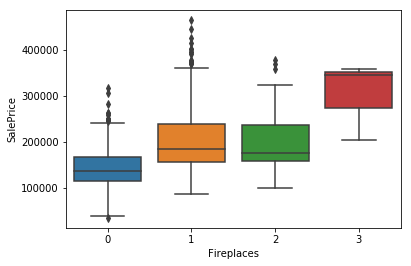

In [77]:
sns.boxplot(x='Fireplaces',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['Fireplaces'].corr(train_full_quant['SalePrice']),3)}")

MasVnrArea / SalePrice

corr : 0.38


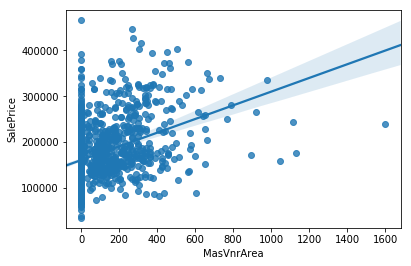

In [78]:
sns.regplot(x='MasVnrArea',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['MasVnrArea'].corr(train_full_quant['SalePrice']),3)}")

OpenPorchSF / SalePrice

corr : 0.376


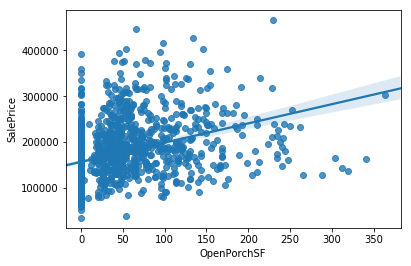

In [79]:
sns.regplot(x='OpenPorchSF',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['OpenPorchSF'].corr(train_full_quant['SalePrice']),3)}")

In [80]:
corrmat3 = train_full_quant[cols3].corr()
corrmat3['SalePrice']

SalePrice       1.000000
OverallQual     0.822381
GrLivArea       0.716049
GarageArea      0.632117
YearBuilt       0.598047
FullBath        0.587783
1stFlrSF        0.587027
YearRemodAdd    0.545475
Fireplaces      0.436762
MasVnrArea      0.379798
OpenPorchSF     0.376041
Name: SalePrice, dtype: float64

In [82]:
print(f"Nombre de NAs dans train_full_quant: \n {train_full_quant.isna().sum()}")

Nombre de NAs dans train_full_quant: 
 MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


In [90]:
train_full_quant = train_full_quant[cols3]

### Split du train_full_quant en train et val

In [91]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 42
random.seed(SEED)
train, val= train_test_split(train_full_quant, test_size=0.3)

print("Train full shape: " + str(train_full_quant.shape))
print("Train shape: " + str(train.shape))
print("Val shape: " + str(val.shape))

Train full shape: (1284, 11)
Train shape: (898, 11)
Val shape: (386, 11)


### Séparation de X_train et Y_train sur train et val

In [92]:
target_column = 'SalePrice'
Y_train = train[target_column].values
X_train = train.drop(target_column, axis=1).values
X_val = val.drop(target_column, axis=1).values
Y_val = val[target_column].values

### Normalisation X

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
print(X_train_scaled.shape)

(898, 10)


### Transfo SalePrice en log

In [94]:
Y_train = np.log1p(Y_train)
Y_val = np.log1p(Y_val)

### Normalisation Y

In [95]:
Y_train_reshaped = np.reshape(Y_train, (Y_train.shape[0], 1))
print(Y_train_reshaped.shape)
Y_val_reshaped = np.reshape(Y_val, (Y_val.shape[0], 1))
print(Y_val_reshaped.shape)

(898, 1)
(386, 1)


In [96]:
scaler2 = StandardScaler()
scaler2.fit(Y_train_reshaped)

Y_train_scaled = scaler2.transform(Y_train_reshaped)
Y_val_scaled = scaler2.transform(Y_val_reshaped)

### Création modèle Sequential

In [97]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [203]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model.add(Input(shape=X_train_scaled.shape[1]))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))
loss = 'mse'
LEARNING_RATE = 0.001
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))
BATCH_SIZE = X_train_scaled.shape[0]
EPOCHS = 1000
history = model.fit(X_train_scaled, Y_train_scaled, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 898 samples
Epoch 1/1000
898/898 [==============================] - 1s 716us/sample - loss: 0.8141
Epoch 2/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.8111
Epoch 3/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.8081
Epoch 4/1000
898/898 [==============================] - 0s 8us/sample - loss: 0.8050
Epoch 5/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.8020
Epoch 6/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.7990
Epoch 7/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.7959
Epoch 8/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.7929
Epoch 9/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.7899
Epoch 10/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.7869
Epoch 11/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.7839
Epoch 12/1000
898/898 [=================

898/898 [==============================] - 0s 9us/sample - loss: 0.5779
Epoch 97/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.5762
Epoch 98/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.5744
Epoch 99/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.5727
Epoch 100/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.5710
Epoch 101/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.5693
Epoch 102/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.5676
Epoch 103/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.5659
Epoch 104/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.5642
Epoch 105/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.5626
Epoch 106/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.5610
Epoch 107/1000
898/898 [==============================] - 0s 

Epoch 191/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.4587
Epoch 192/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.4579
Epoch 193/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.4570
Epoch 194/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.4561
Epoch 195/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.4553
Epoch 196/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.4544
Epoch 197/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.4536
Epoch 198/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.4527
Epoch 199/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.4519
Epoch 200/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.4510
Epoch 201/1000
898/898 [==============================] - 0s 8us/sample - loss: 0.4502
Epoch 202/1000
898/898 [===================

Epoch 286/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.3883
Epoch 287/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.3877
Epoch 288/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.3871
Epoch 289/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.3864
Epoch 290/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.3858
Epoch 291/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.3852
Epoch 292/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.3846
Epoch 293/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.3839
Epoch 294/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.3833
Epoch 295/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.3827
Epoch 296/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.3821
Epoch 297/1000
898/898 [===================

898/898 [==============================] - 0s 6us/sample - loss: 0.3363
Epoch 381/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.3358
Epoch 382/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.3353
Epoch 383/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.3348
Epoch 384/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.3343
Epoch 385/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.3339
Epoch 386/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.3334
Epoch 387/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.3329
Epoch 388/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.3325
Epoch 389/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.3320
Epoch 390/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.3315
Epoch 391/1000
898/898 [==============================] - 

Epoch 475/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2967
Epoch 476/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2964
Epoch 477/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2960
Epoch 478/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2957
Epoch 479/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2953
Epoch 480/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2950
Epoch 481/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2946
Epoch 482/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2943
Epoch 483/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2939
Epoch 484/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2936
Epoch 485/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2932
Epoch 486/1000
898/898 [===================

Epoch 570/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2670
Epoch 571/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2667
Epoch 572/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2665
Epoch 573/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2662
Epoch 574/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2659
Epoch 575/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2657
Epoch 576/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2654
Epoch 577/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2651
Epoch 578/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2649
Epoch 579/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2646
Epoch 580/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2643
Epoch 581/1000
898/898 [===================

898/898 [==============================] - 0s 6us/sample - loss: 0.2446
Epoch 665/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2444
Epoch 666/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2442
Epoch 667/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2440
Epoch 668/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2438
Epoch 669/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2436
Epoch 670/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2434
Epoch 671/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2432
Epoch 672/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2430
Epoch 673/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2428
Epoch 674/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2426
Epoch 675/1000
898/898 [==============================] - 

Epoch 759/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2271
Epoch 760/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2269
Epoch 761/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2268
Epoch 762/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2266
Epoch 763/1000
898/898 [==============================] - 0s 8us/sample - loss: 0.2264
Epoch 764/1000
898/898 [==============================] - 0s 8us/sample - loss: 0.2263
Epoch 765/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2261
Epoch 766/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2260
Epoch 767/1000
898/898 [==============================] - 0s 9us/sample - loss: 0.2258
Epoch 768/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2256
Epoch 769/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.2255
Epoch 770/1000
898/898 [===================

Epoch 854/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2130
Epoch 855/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2128
Epoch 856/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2127
Epoch 857/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.2126
Epoch 858/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2124
Epoch 859/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2123
Epoch 860/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2122
Epoch 861/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2120
Epoch 862/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.2119
Epoch 863/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2118
Epoch 864/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2117
Epoch 865/1000
898/898 [===================

Epoch 949/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2015
Epoch 950/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2014
Epoch 951/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2013
Epoch 952/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2012
Epoch 953/1000
898/898 [==============================] - 0s 7us/sample - loss: 0.2011
Epoch 954/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2010
Epoch 955/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2009
Epoch 956/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2008
Epoch 957/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2007
Epoch 958/1000
898/898 [==============================] - 0s 4us/sample - loss: 0.2006
Epoch 959/1000
898/898 [==============================] - 0s 6us/sample - loss: 0.2004
Epoch 960/1000
898/898 [===================

In [204]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                220       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
_________________________________________________________________
input_2 (InputLayer)         multiple                  0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

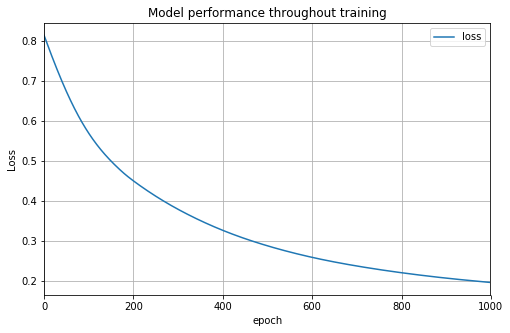

In [205]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

### Prédiction sur X_val

In [101]:
predict = model.predict(X_val_scaled)

### Calcul de l'erreur sur la prédiction (MSE)

In [102]:
from sklearn.metrics import mean_squared_error

mse_krm=mean_squared_error(Y_val_scaled, predict)
print(mse_krm)

0.1481802114287765


In [103]:
rmse = np.sqrt(mse_krm)
rmse

0.38494182862969895

### Reconversion du SalePrice

In [104]:
predict = scaler2.inverse_transform(predict)
predict  = np.e**predict

### Choix des colonne sur le test_full

In [110]:
cols3 = cols3.drop("SalePrice")
test = test_full[cols3]

In [111]:
test

,OverallQual,GrLivArea,GarageArea,YearBuilt,FullBath,1stFlrSF,YearRemodAdd,Fireplaces,MasVnrArea,OpenPorchSF
0,5,896,730.0,1961,1,896,1961,0,0.0,0
1,6,1329,312.0,1958,1,1329,1958,0,108.0,36
2,5,1629,482.0,1997,2,928,1998,1,0.0,34
3,6,1604,470.0,1998,2,926,1998,1,20.0,36
4,8,1280,506.0,1992,2,1280,1992,0,0.0,82
...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,1970,1,546,1970,0,0.0,0
1455,4,1092,286.0,1970,1,546,1970,0,0.0,24
1456,5,1224,576.0,1960,1,1224,1996,1,0.0,0
1457,5,970,0.0,1992,1,970,1992,0,0.0,32


### Transfo du test

In [144]:
test = test.fillna(0)

In [145]:
test.isna().sum()

OverallQual     0
GrLivArea       0
GarageArea      0
YearBuilt       0
FullBath        0
1stFlrSF        0
YearRemodAdd    0
Fireplaces      0
MasVnrArea      0
OpenPorchSF     0
dtype: int64

In [146]:
test_scaled = scaler.transform(test)

### Prédictions sur le test

In [147]:
predict_test = model.predict(test_scaled)

In [148]:
predict_test

array([[-0.89096284],
       [-0.49023205],
       [-0.05869185],
       ...,
       [-0.3051048 ],
       [-0.98444676],
       [ 0.84915817]], dtype=float32)

### Reconversion prédiction et soumission Kaggle

In [149]:
predict_test = scaler2.inverse_transform(predict_test)
predict_test  = np.e**predict_test

In [175]:
from pandas import DataFrame
df = DataFrame(data=predict_test, index=test_full_Id)
df = df.astype('int64')
df


,0
Id,
1461,121024
1462,139054
1463,161485
1464,177088
1465,197720
...,...
2915,94188
2916,101631
2917,148267


In [178]:
df.columns = ['SalePrice']
#df = df.rename(columns={"":"SalePrice"})
df

,SalePrice
Id,
1461,121024
1462,139054
1463,161485
1464,177088
1465,197720
...,...
2915,94188
2916,101631
2917,148267


In [179]:
df.to_csv('prediction.csv')

Avec XGBoost

In [191]:
from xgboost import XGBRegressor

model2 = XGBRegressor()

In [192]:
model2.fit(X_train_scaled, Y_train_scaled)

[17:14:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [193]:
prediction_boost = model2.predict(X_val_scaled)

In [196]:
prediction_boost_test = model2.predict(test_scaled)

In [197]:
prediction_boost_test = scaler2.inverse_transform(prediction_boost_test)
prediction_boost_test  = np.e**prediction_boost_test

In [198]:
df2 = DataFrame(data=prediction_boost_test, index=test_full_Id)
df2 = df2.astype('int64')
df2.columns = ['SalePrice']
df2

,SalePrice
Id,
1461,128820
1462,138722
1463,168369
1464,180961
1465,206416
...,...
2915,73209
2916,80980
2917,153174


In [199]:
df2.to_csv('prediction_boost.csv')